In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Code to create sample data set

In [3]:
housingDataSet = pd.csv()

AttributeError: module 'pandas' has no attribute 'csv'

In [110]:
housingData = {'Living area (ft^2':[2104,1600,2400,1416,3000], 
'# Bedrooms': [3,3,3,2,4], 
'Price (1000$s)': [400,330,369,232,540]}

housingDF = pd.DataFrame(data = housingData)


housingDF

,Living area (ft^2,# Bedrooms,Price (1000$s)
0,2104,3,400
1,1600,3,330
2,2400,3,369
3,1416,2,232
4,3000,4,540


In [234]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y, theta, alpha, num_iters):
    m = len(y)
    costs = []
    
    for i in range(0, num_iters):
        hypothesis = np.dot(X, theta)
        error = hypothesis - y
        gradient = np.dot(X.T, error) / m
        theta = theta - alpha * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)
    return theta, costs

def predict(x, theta):
    return np.dot(x, theta)

def cost_function(x, y, theta):
    m = len(y)
    hypothesis = predict(x, theta)
    error = hypothesis - y
    cost = np.sum(error ** 2) / (2*m)
    return cost

def normalEquation(x,y):
    
#     x = np.c_[np.ones(X.shape[0]),X]
    
    A = np.linalg.inv(np.dot(np.transpose(x), x))
    
    B = np.dot(np.transpose(x),y)
    
    theta = np.dot(A,B)
    
    return theta



The optimized theta values:  [-7.04346018e+01  6.38433756e-02  1.03436047e+02]
The cost:  144.4144432699083


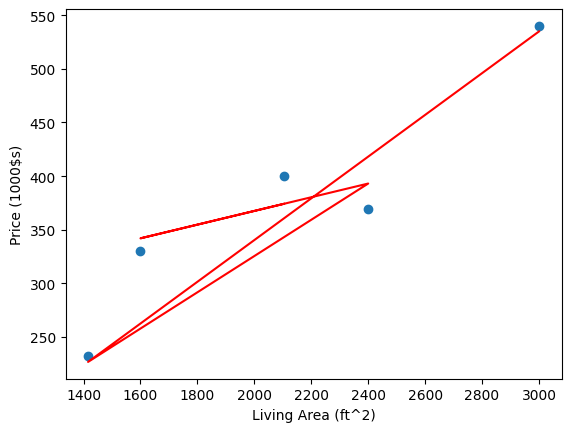

In [236]:
# Convert the DataFrame into a NumPy array
data = np.array(housingDF)

# Extract the first two columns as input features and the third column as output
X = data[:, :2]
y = data[:, 2]

np.shape(X)

# print(X)

# print(np.shape(X))
# print(np.shape(y))

# Get the number of training examples
m = len(y)

# # Add a column of ones to the input matrix for the bias term
X = np.hstack((np.ones((m, 1)), X))

# print(X)

# print(q)

# print(np.shape(X))
# print(np.shape(y))

# Initialize the model parameters to zero
# theta = np.zeros(3)

# Set the hyperparameters for gradient descent
num_iters = 1500
alpha = 0.0000001

# Run the normal equation to find the optimal theta values
theta = normalEquation(X, y)

# print(theta)

# Run gradient descent to find the optimal theta values
# theta, costs = gradient_descent(X, y, theta, alpha, num_iters)

# Print the optimized theta values and the final cost
print("The optimized theta values: ", theta)
print("The cost: ", cost_function(X, y, theta))

# Plot the data points and the linear regression line
plt.scatter(X[:, 1], y)
plt.xlabel("Living Area (ft^2)")
plt.ylabel("Price (1000$s)")
plt.plot(X[:, 1], predict(X, theta), 'r')
plt.show()

# Generate the grid of theta values for the contour plot
theta_0_vals, theta_1_vals = np.linspace(-10, 10, 100), np.linspace(-1, 4, 100)
theta_0_vals, theta_1_vals = np.meshgrid(theta_0_vals, theta_1_vals)
cost_vals = np.zeros(theta_0_vals.shape)

# Calculate the cost for each value of theta_0 and theta_1
for i in range(theta_0_vals.shape[1]):
    for j in range(theta_1_vals.shape[0]):
        theta = np.array([theta_0_vals[j, i], theta_1_vals[j, i]])
        cost_vals[j, i] = cost_function(X[:, 1:3], y, theta)



In [172]:
import numpy as np

class LinearRegression:
    def __init__(self, fit_intercept=True, method='bgd', alpha=0.01, num_iterations=1000):
        self.fit_intercept = fit_intercept
        self.method = method
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.theta = None
        
    def _add_intercept(self, X):
        m = X.shape[0]
        return np.hstack((np.ones((m, 1)), X))
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self._add_intercept(X)
        
        if self.method == 'bgd':
            self.theta = self._batch_gradient_descent(X, y)
        elif self.method == 'normal':
            self.theta = self._normal_equation(X, y)
        else:
            raise ValueError("Unknown method %s" % self.method)
        
    def predict(self, X):
        if self.fit_intercept:
            X = self._add_intercept(X)
        return np.dot(X, self.theta)
    
    def _batch_gradient_descent(self, X, y):
        m, n = X.shape
        theta = np.zeros(n)
        for i in range(self.num_iterations):
            hypothesis = np.dot(X, theta)
            error = hypothesis - y
            gradient = np.dot(X.T, error) / m
            theta = theta - self.alpha * gradient
        return theta
    
    def _normal_equation(self, X, y):
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the housing data into a DataFrame
housingDF = pd.DataFrame({
    'Living area (ft^2)': [2104, 1600, 2400, 1416, 3000],
    '# Bedrooms': [3, 3, 3, 2, 4],
    'Price (1000$s)': [400, 330, 369, 232, 540]
})

# Extract the input features and target variable as NumPy arrays
X = housingDF[['Living area (ft^2)', '# Bedrooms']].values
y = housingDF['Price (1000$s)'].values

# Create an instance of the LinearRegression class
lr = LinearRegression()

# Train the model using the normal equation
lr.fit(X, y)

# Print the model coefficients and intercept
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

# Make a prediction for a new input example
x_new = np.array([2000, 3])
y_pred = lr.predict(x_new)
print('Predicted price:', y_pred)

# Visualize the model predictions
plt.scatter(X[:, 0], y)
plt.xlabel('Living area (ft^2)')
plt.ylabel('Price (1000$s)')
x_line = np.linspace(1000, 3500, 100)
y_line = lr.intercept_ + lr.coef_[0]*x_line + lr.coef_[1]*3
plt.plot(x_line, y_line, color='red')
plt.show()


/var/folders/t0/6g2ykcn10195fc8rwbkghyfm0000gn/T/ipykernel_70517/1742793671.py:38: RuntimeWarning: invalid value encountered in subtract
  theta = theta - self.alpha * gradient


AttributeError: 'LinearRegression' object has no attribute 'coef_'